In [2]:
import pandas,numpy
import matplotlib ,seaborn
%matplotlib inline

In [3]:
Data = pandas.read_csv('Classified Data' , index_col=0)

FileNotFoundError: File b'Classified Data' does not exist

In [ ]:
Data.head()

In [ ]:
Data.info()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler = StandardScaler()

In [ ]:
Scaler.fit(Data.drop('TARGET CLASS' , axis=1) )

In [ ]:
scaledFeature = Scaler.transform(Data.drop('TARGET CLASS' , axis=1))

In [ ]:
scaledFeature

In [ ]:
Features = pandas.DataFrame(data = scaledFeature , columns=Data.columns[:-1])

In [ ]:
Features.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = Features
Y = Data['TARGET CLASS']

In [ ]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(X , Y , test_size = 0.3 , random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
KNN.fit(X_Train , Y_Train)

In [ ]:
Predictions = KNN.predict(X_Test)

In [ ]:
Predictions

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(Y_Test , Predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

   micro avg       0.94      0.94      0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [28]:
print(confusion_matrix(Y_Test , Predictions))

[[154   5]
 [ 12 129]]


In [30]:
Error_Rate = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train , Y_Train)
    predict = knn.predict(X_Test)
    Error_Rate.append(numpy.mean(predict != Y_Test))
    

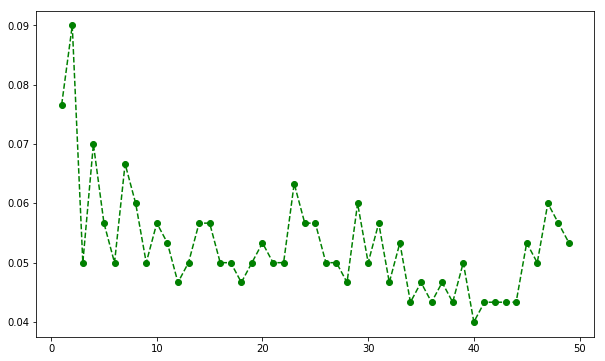

In [42]:
matplotlib.pyplot.figure(figsize = (10,6))
matplotlib.pyplot.plot(range(1,50) , Error_Rate,linestyle='dashed'  , marker='o' , color='g')

In [43]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_Train , Y_Train)
predictions = knn.predict(X_Test)

In [45]:
print(confusion_matrix(Y_Test , predictions))

[[154   5]
 [  7 134]]


In [46]:
print(classification_report(Y_Test , predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

